<a href="https://colab.research.google.com/github/GenAIUnplugged/langchain_series/blob/main/Lazy_Loading.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

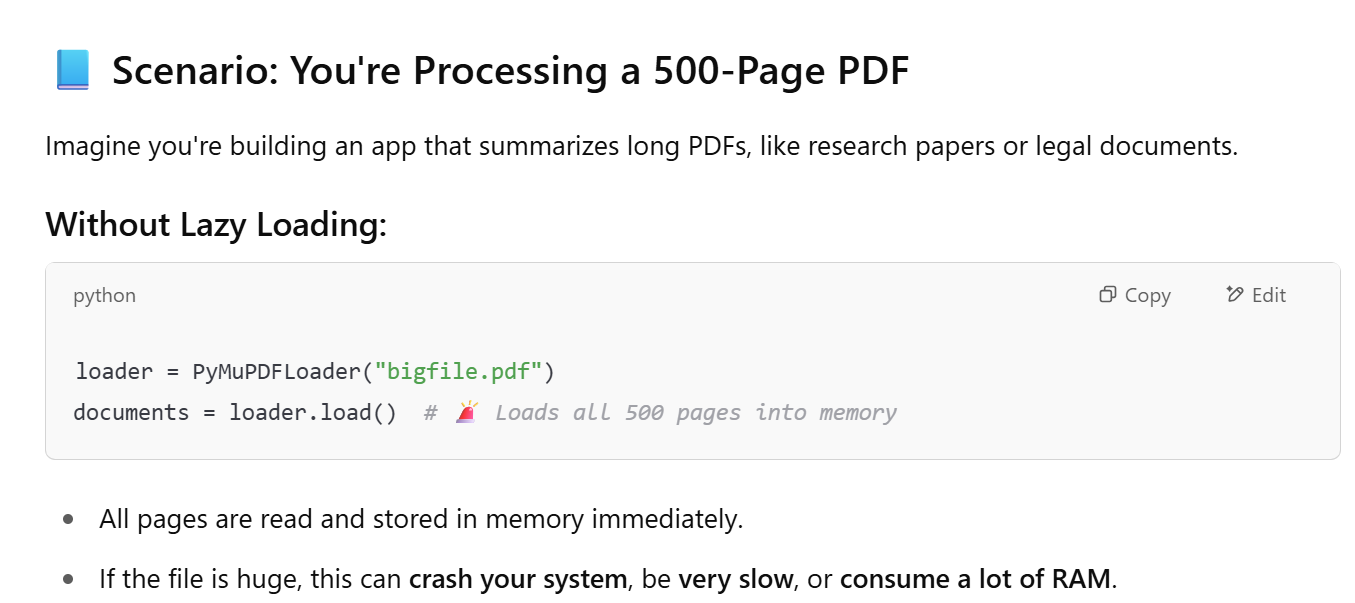

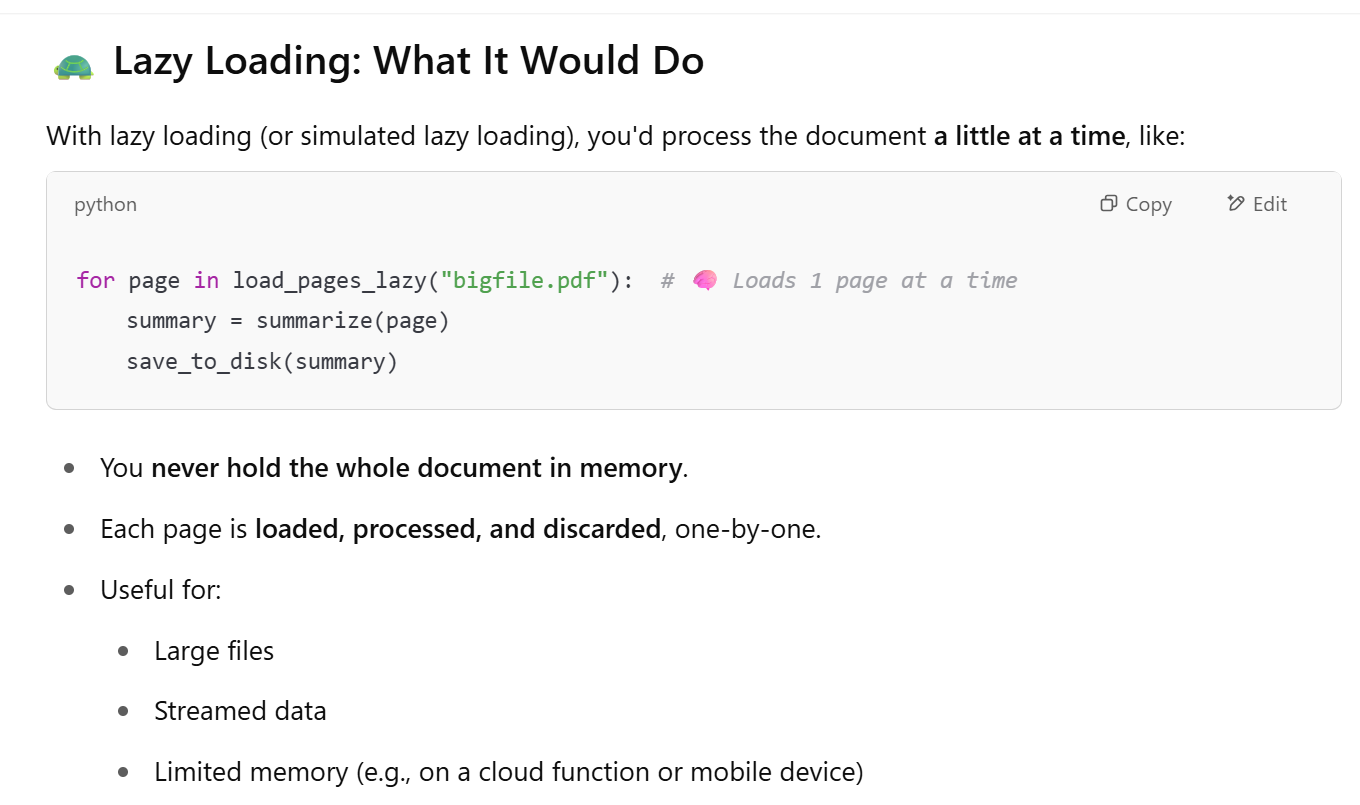

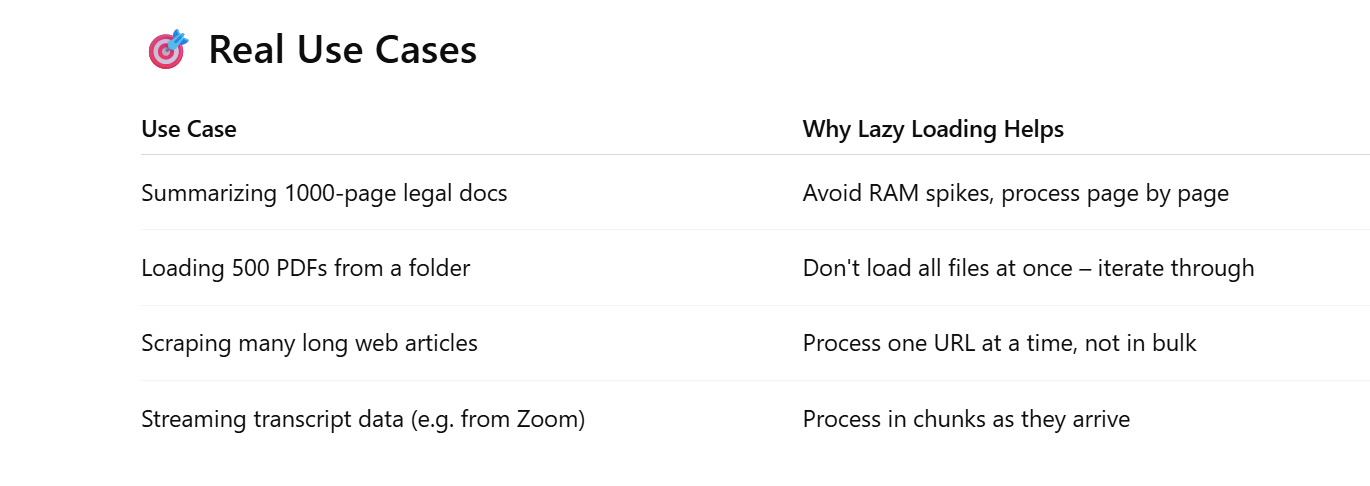

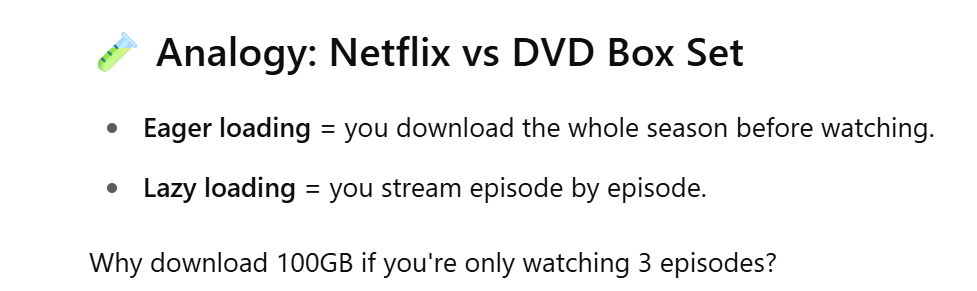

In [4]:
!pip install langchain pymupdf langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00


In [5]:
from langchain_community.document_loaders import PyMuPDFLoader

In [7]:
path = "/content/dokumen.pub_generative-deep-learning-teaching-machines-to-paint-write-compose-and-play-1492041947-978-1492041948.pdf"

In [8]:
loader = PyMuPDFLoader(path)

In [9]:
loader

In this loop:
* loader.lazy_load() returns an iterator that yields one Document object per page.
* Each Document contains the page_content and metadata, such as the page number and source file.
* This approach ensures that only one page is loaded into memory at a time, making it suitable for processing large PDFs.



In [11]:
for page_number, document in enumerate(loader.lazy_load()):
    # Access the content of each page
    content = document.page_content
    metadata = document.metadata  # Includes page number and source

    # Example: Print the first 100 characters of each page
    print(f"Page {metadata['page'] + 1}: {content[:100]}...\n")

Page 1: David Foster
Generative
Deep Learning
Teaching Machines to Paint, Write, 
Compose and Play...

Page 2: ...

Page 3: David Foster
Generative Deep Learning
Teaching Machines to Paint, Write,
Compose, and Play
Boston
Fa...

Page 4: 978-1-492-04194-8
[LSI]
Generative Deep Learning
by David Foster
Copyright © 2019 Applied Data Scien...

Page 5: Table of Contents
Preface. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ....

Page 6: Building the Model                                                                                  ...

Page 7: Mode Collapse                                                                                       ...

Page 8: Long Short-Term Memory Networks                                                                     ...

Page 9: 8. Play. . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . ....

Page 10: BigGAN                                                                              

In [12]:
docs = loader.load()

In [13]:
len(docs)

330

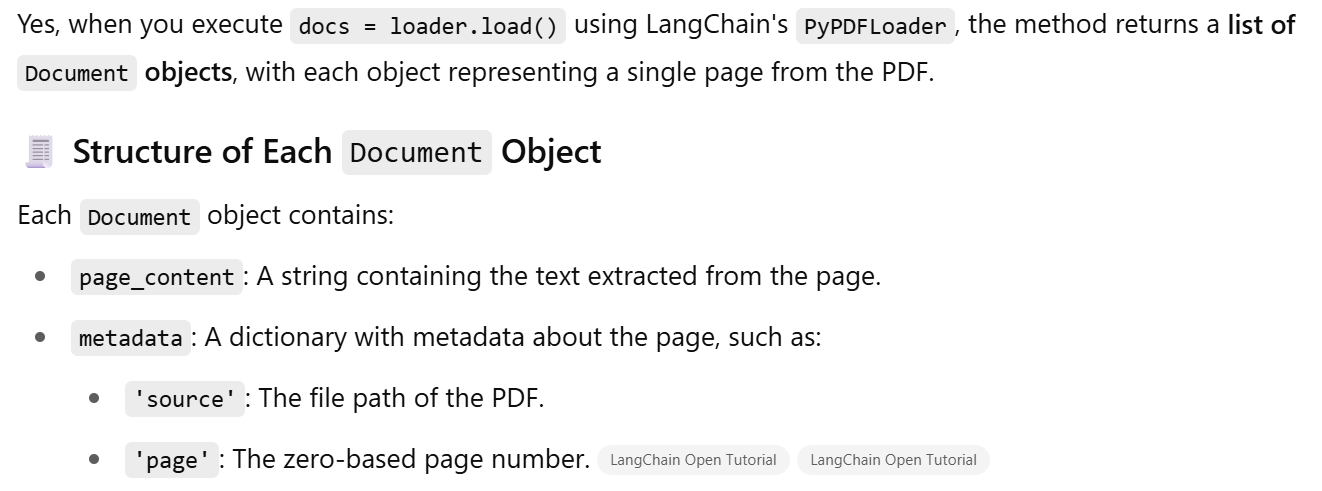

In [14]:
# Access the first document
first_doc = docs[0]
print(first_doc.page_content)  # Text content of the first page
print(first_doc.metadata)      # Metadata dictionary, e.g., {'source': 'your_file.pdf', 'page': 0}

David Foster
Generative
Deep Learning
Teaching Machines to Paint, Write, 
Compose and Play
{'producer': 'Antenna House PDF Output Library 6.2.609 (Linux64)', 'creator': 'AH CSS Formatter V6.2 MR4 for Linux64 : 6.2.6.18551 (2014/09/24 15:00JST)', 'creationdate': '2019-06-26T20:55:56+00:00', 'source': '/content/dokumen.pub_generative-deep-learning-teaching-machines-to-paint-write-compose-and-play-1492041947-978-1492041948.pdf', 'file_path': '/content/dokumen.pub_generative-deep-learning-teaching-machines-to-paint-write-compose-and-play-1492041947-978-1492041948.pdf', 'total_pages': 330, 'format': 'PDF 1.6', 'title': 'Generative Deep Learning', 'author': 'David Foster;', 'subject': '', 'keywords': '', 'moddate': '2019-07-05T04:55:24-04:00', 'trapped': '', 'modDate': "D:20190705045524-04'00'", 'creationDate': 'D:20190626205556Z', 'page': 0}


In [16]:
first_doc.metadata["source"]

'/content/dokumen.pub_generative-deep-learning-teaching-machines-to-paint-write-compose-and-play-1492041947-978-1492041948.pdf'

In [21]:
first_doc.metadata.items()

dict_items([('producer', 'Antenna House PDF Output Library 6.2.609 (Linux64)'), ('creator', 'AH CSS Formatter V6.2 MR4 for Linux64 : 6.2.6.18551 (2014/09/24 15:00JST)'), ('creationdate', '2019-06-26T20:55:56+00:00'), ('source', '/content/dokumen.pub_generative-deep-learning-teaching-machines-to-paint-write-compose-and-play-1492041947-978-1492041948.pdf'), ('file_path', '/content/dokumen.pub_generative-deep-learning-teaching-machines-to-paint-write-compose-and-play-1492041947-978-1492041948.pdf'), ('total_pages', 330), ('format', 'PDF 1.6'), ('title', 'Generative Deep Learning'), ('author', 'David Foster;'), ('subject', ''), ('keywords', ''), ('moddate', '2019-07-05T04:55:24-04:00'), ('trapped', ''), ('modDate', "D:20190705045524-04'00'"), ('creationDate', 'D:20190626205556Z'), ('page', 0)])